In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install shap
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from joblib import dump
import shap

In [ ]:
hrp_dataset = pd.read_csv('hypertension_data.csv')
hrp_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
normalized_dataset = (hrp_dataset-hrp_dataset.min())/(hrp_dataset.max()-hrp_dataset.min())
print(hrp_dataset.max()-hrp_dataset.min())
normalized_dataset.head()

age          87.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.528736,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.609195,0.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.471264,1.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.517241,0.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.632184,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


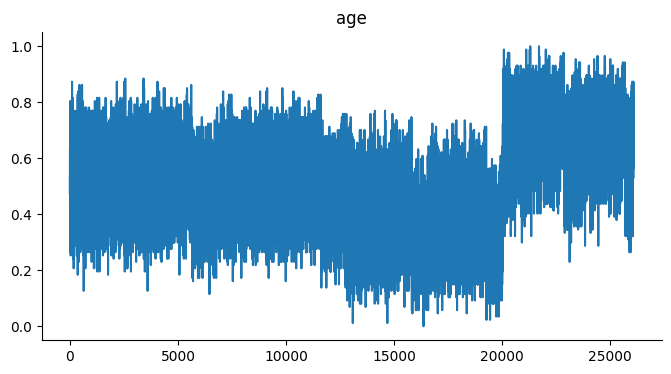

In [ ]:
# @title age

from matplotlib import pyplot as plt
normalized_dataset['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
normalized_dataset.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.528736,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.609195,0.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.471264,1.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.517241,0.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.632184,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,0.701149,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
26079,0.563218,1.0,0.000000,0.471698,0.168950,0.0,0.0,0.419847,1.0,0.145161,0.5,0.00,1.000000,0.0
26080,0.655172,1.0,0.000000,0.056604,0.246575,0.0,0.5,0.648855,0.0,0.016129,1.0,0.25,1.000000,0.0
26081,0.643678,1.0,0.333333,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,1.0,0.25,0.666667,0.0


In [ ]:
y = normalized_dataset.pop('target')
X = normalized_dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("X Train Size: ", X_train.shape)
print("X Test Size: ", X_test.shape)
print("y Train Size: ", y_train.shape)
print("y Test Size: ", y_test.shape)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X Train Size:  (18258, 13)
X Test Size:  (7825, 13)
y Train Size:  (18258,)
y Test Size:  (7825,)


In [ ]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=8, learning_rate=0.1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
print(X_test[1:5])
print(preds)

[[0.48275862 1.         0.         0.24528302 0.40182648 0.
  0.         0.61068702 0.         0.06451613 0.5        0.
  0.66666667]
 [0.82758621 1.         0.66666667 0.33962264 0.20091324 0.
  0.         0.74045802 0.         0.32258065 0.5        0.
  0.66666667]
 [0.63218391 0.         0.66666667 0.24528302 0.20319635 0.
  0.5        0.75572519 0.         0.         1.         0.
  0.66666667]
 [0.7816092  0.         0.33333333 0.24528302 0.31278539 0.
  0.5        0.77862595 0.         0.         1.         0.
  1.        ]]
[0 1 1 ... 0 1 0]


In [ ]:
import xgboost
bst = xgboost.DMatrix(X_train, label=y_train)
test_bst = xgboost.DMatrix(X_test, label=y_test)
model = xgboost.train({"eta": 1, "max_depth": 3, "base_score": 0, "lambda": 0}, bst, 1)
print("Model error =", model.predict(test_bst))
print(model.get_dump(with_stats=True)[0])

Model error = [0.8886192  0.648576   0.01816657 ... 0.01816657 0.01816657 0.8886192 ]
0:[f2<0.333333343] yes=1,no=2,missing=2,gain=1183.70459,cover=18258
	1:[f11<0.25] yes=3,no=4,missing=4,gain=461.359985,cover=8593
		3:[f12<1] yes=7,no=8,missing=8,gain=316.455688,cover=3878
			7:leaf=0.769733965,cover=2293
			8:leaf=0.18864353,cover=1585
		4:[f9<0.0645161271] yes=9,no=10,missing=10,gain=34.8000336,cover=4715
			9:leaf=0.218997359,cover=1137
			10:leaf=0.0181665737,cover=3578
	2:[f12<1] yes=5,no=6,missing=6,gain=195.680176,cover=9665
		5:[f9<0.403225809] yes=11,no=12,missing=12,gain=74.1787109,cover=7301
			11:leaf=0.888619184,cover=7003
			12:leaf=0.379194617,cover=298
		6:[f7<0.541984737] yes=13,no=14,missing=14,gain=109.271667,cover=2364
			13:leaf=0.123260438,cover=503
			14:leaf=0.648576021,cover=1861



In [ ]:
pred = model.predict(test_bst, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(test_bst)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

1.1920929e-07

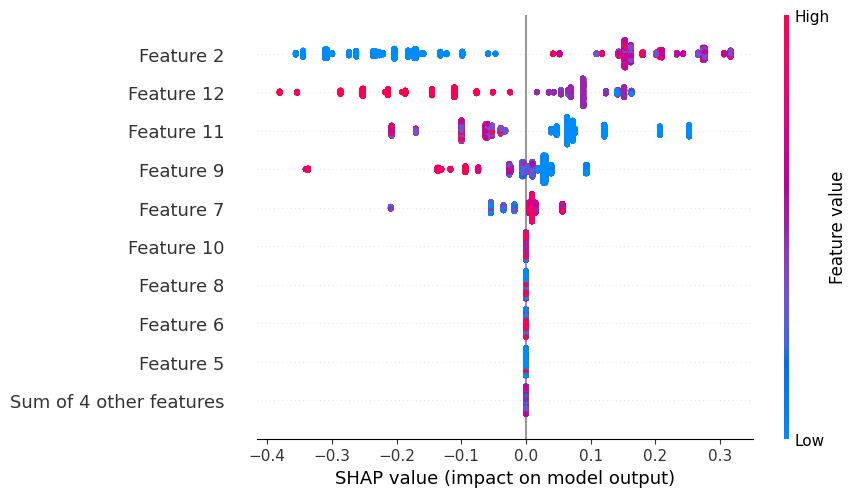

In [ ]:
shap.plots.beeswarm(explanation)

In [ ]:
# model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_train, y_train)

# compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X[:1000])

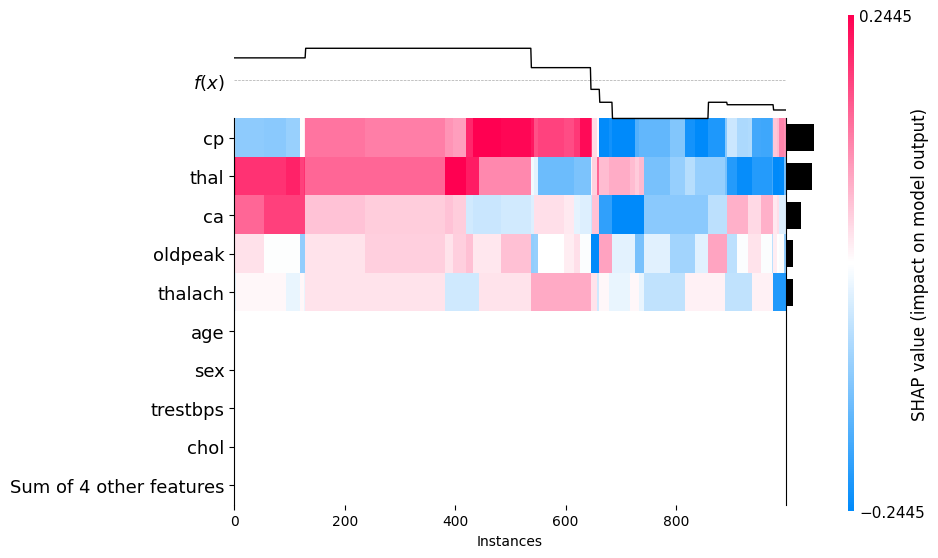

In [ ]:
shap.plots.heatmap(shap_values)

In [ ]:
# Analysis using SHAP
explainer = shap.TreeExplainer(bst, X_train[:100])
shap_values = explainer.shap_values(X_test[:10])

In [ ]:
pred = np.around(pred)
print(pred[:10])
print(y_test[:10])
accuracy_score(pred, y_test)

[1. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
[1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]


0.8564856230031949

In [ ]:
dump(model, '/content/model.joblib')

['/content/model.joblib']

#####################################################################################################################################################################################################################################################################################################################
K - means

In [ ]:
np.any(np.isnan(X_train))
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [ ]:
Kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=10, random_state=None, tol=0.0001, verbose=0)
Kmean.fit(X_train)
pred_values = Kmean.predict(X_test)
accuracy_score(pred_values, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


0.7229392971246006

In [ ]:
dump(Kmean, '/content/k_model.joblib')

['/content/k_model.joblib']

#####################################################################################################################################################################################################################################################################################################################
ROC AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, pred_values)

print('roc_auc_score for xgboost: ', roc_auc_score(y_test, pred))
print('roc_auc_score for kmeans: ', roc_auc_score(y_test, pred_values))

roc_auc_score for xgboost:  0.8495013714362737
roc_auc_score for kmeans:  0.7073676996258472


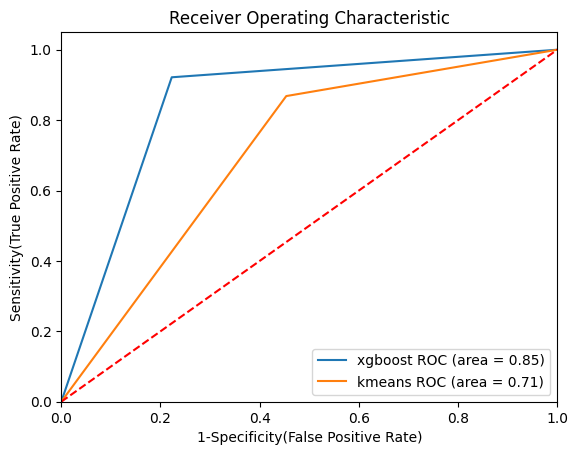

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('xgboost', auc))

fpr, tpr, thresholds = roc_curve(y_test, pred_values)
auc = roc_auc_score(y_test, pred_values)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('kmeans', auc))

# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display